Tableau des valeurs réelles et prédites :
   Actual      Predicted
0  208500  186893.952381
1  181500  163001.787879
2  223500  212350.371429
3  140000  164347.714286
4  250000  287971.300000


<Figure size 1000x600 with 0 Axes>

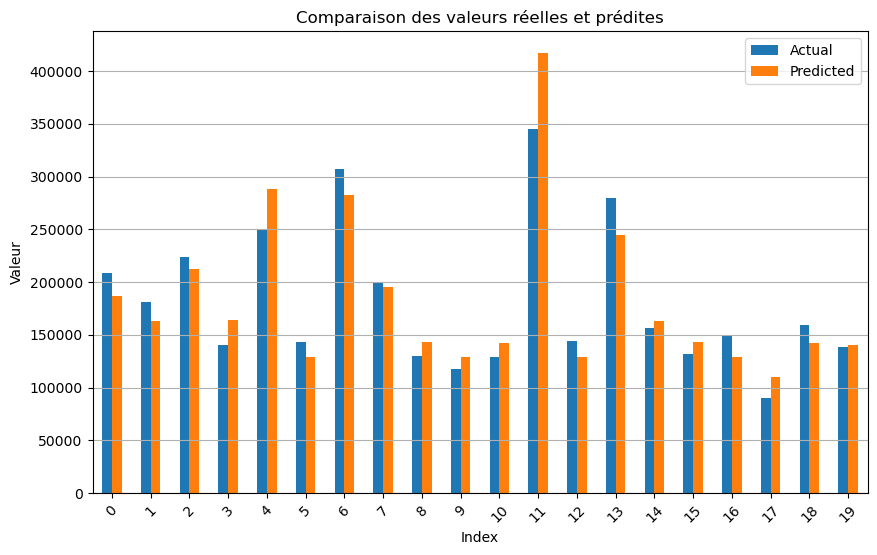

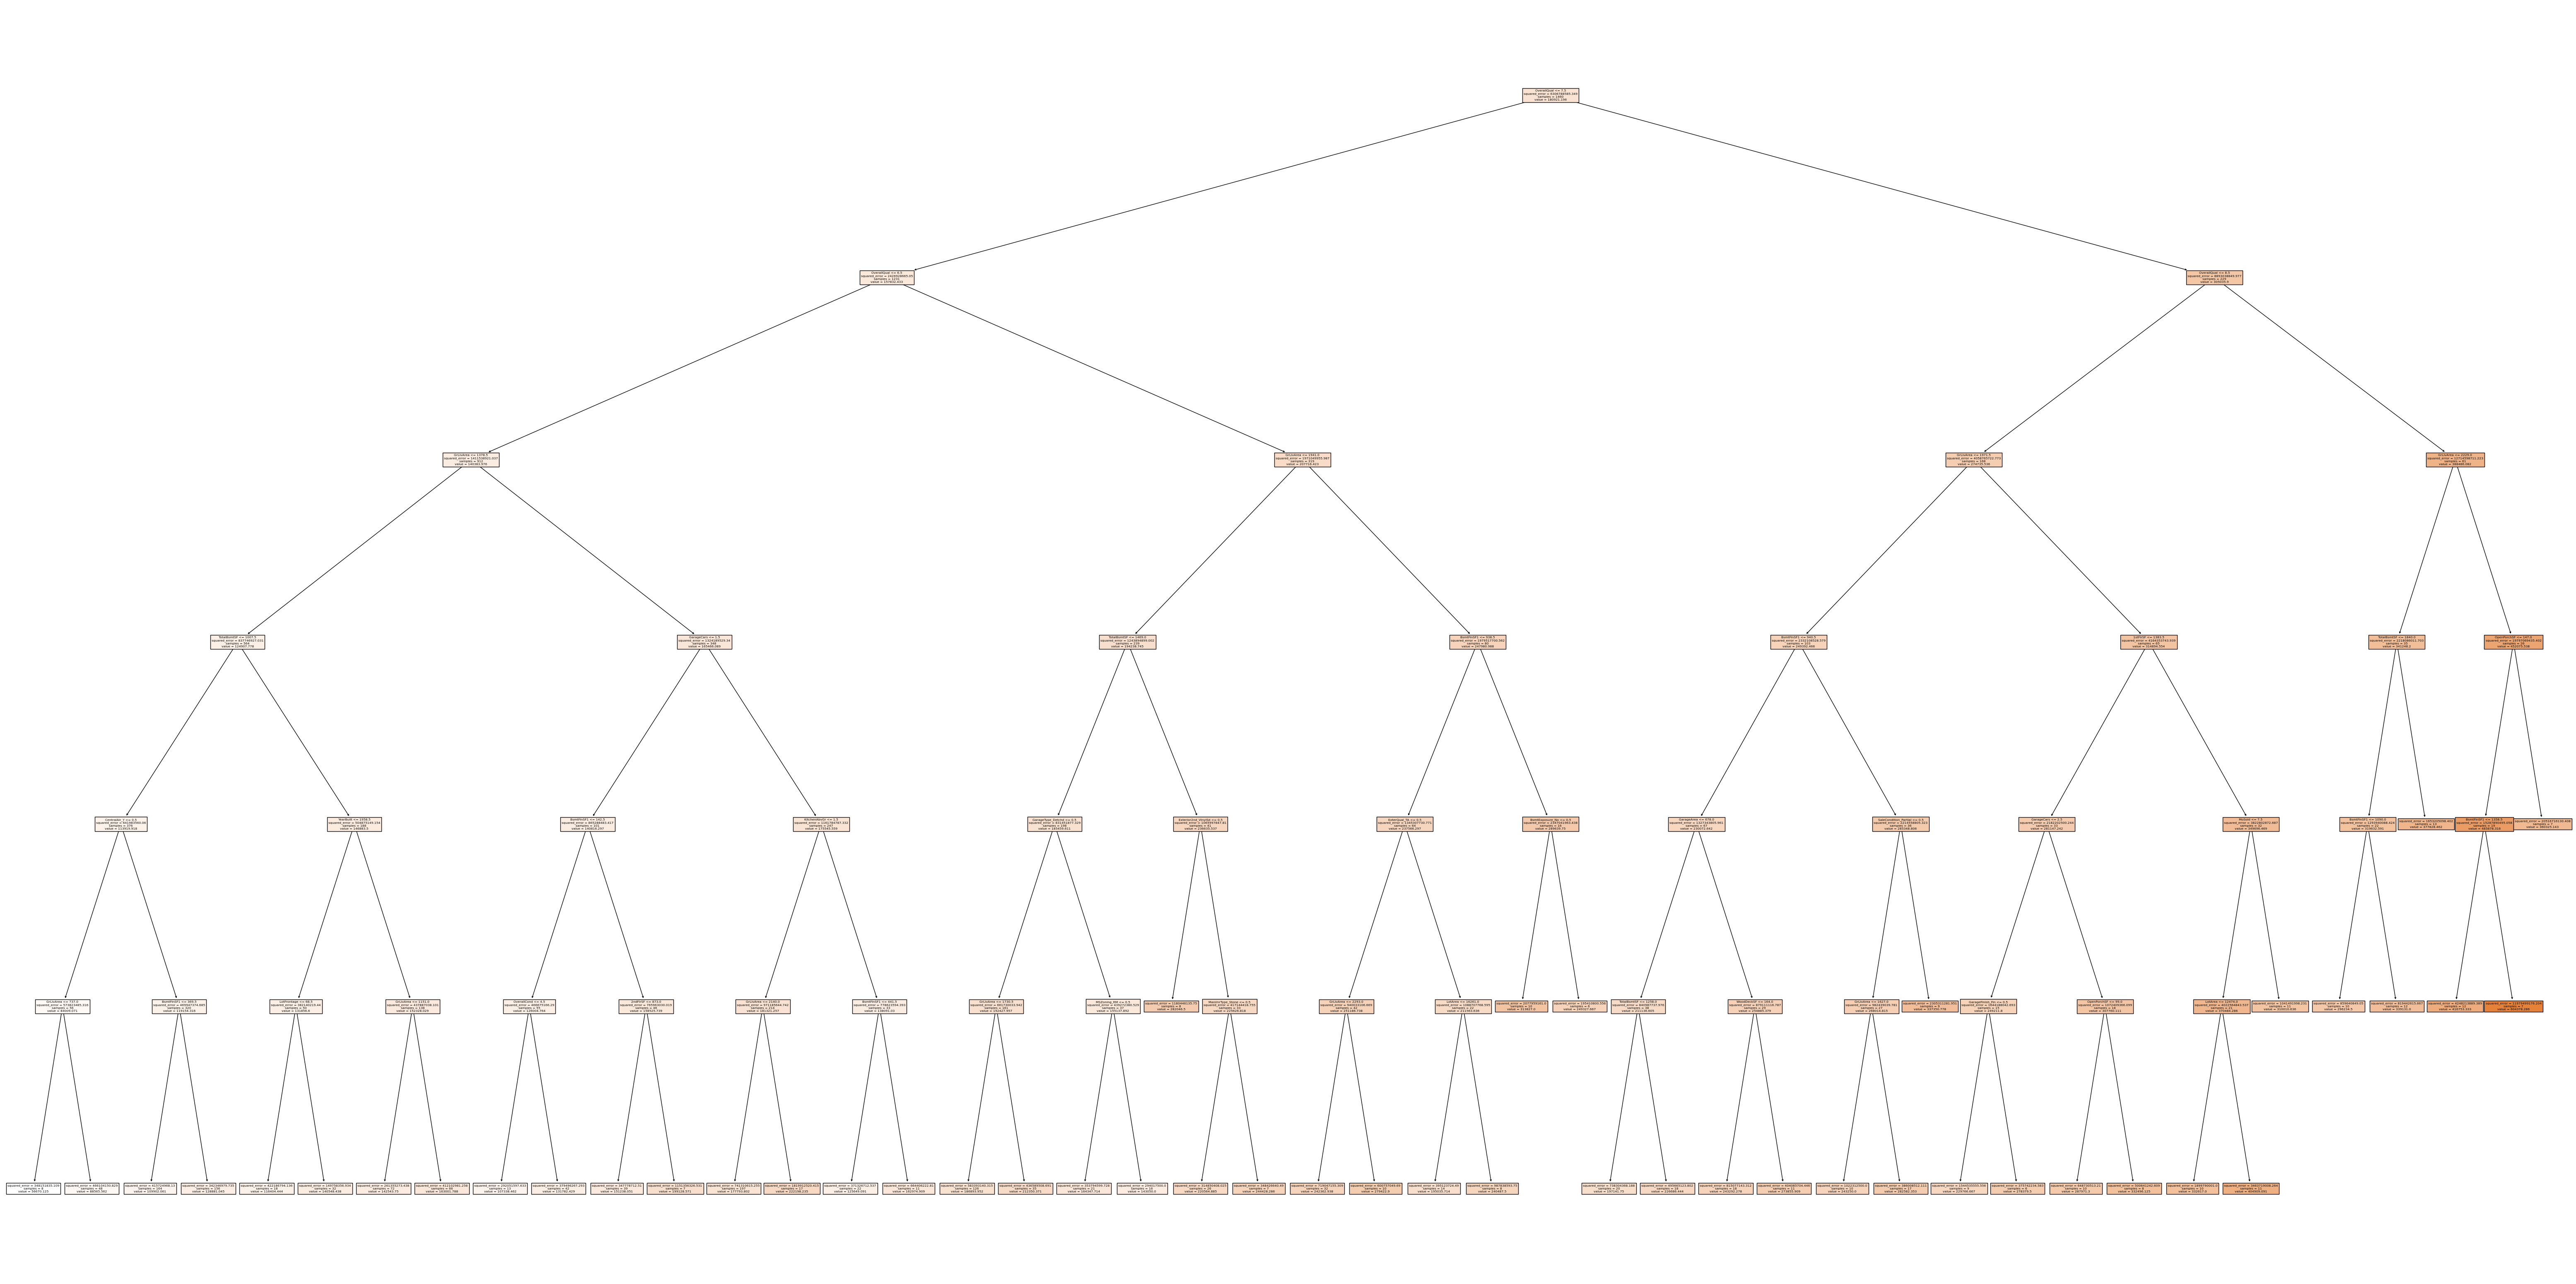

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Charger les données CSV train dans un DataFrame pandas
train_df = pd.read_csv("train.csv")

# Sélectionner uniquement les colonnes non catégorielles pour l'exemple
# Vous devez sélectionner toutes les colonnes catégorielles de votre jeu de données
categorical_columns = train_df.select_dtypes(include=['object']).columns
non_categorical_columns = train_df.select_dtypes(exclude=['object']).columns

# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
train_df[non_categorical_columns] = train_df[non_categorical_columns].fillna(train_df[non_categorical_columns].median())

# Remplacer les valeurs manquantes dans les colonnes catégorielles par 'missing'
train_df[categorical_columns] = train_df[categorical_columns].fillna('missing')

# Convertir les variables catégorielles en variables numériques en utilisant l'encodage one-hot
train_df = pd.get_dummies(train_df, columns=categorical_columns)

# Séparer les caractéristiques (features) et la variable cible (target)
X_train = train_df.drop(columns=["SalePrice", "Id"])
y_train = train_df["SalePrice"]

# Initialiser et entraîner le modèle d'arbre de décision de régression avec des paramètres pour obtenir un arbre moyen
model = DecisionTreeRegressor(max_depth=6, min_samples_split=15, min_samples_leaf=6)
model.fit(X_train, y_train)

# Prédire les valeurs sur les données d'entraînement
y_pred = model.predict(X_train)

# Créer un DataFrame pour comparer les valeurs réelles et prédites
comparison_df = pd.DataFrame({"Actual": y_train, "Predicted": y_pred})

# Afficher les premières lignes du DataFrame
print("Tableau des valeurs réelles et prédites :")
print(comparison_df.head())

# Tracer un graphique à barres comparant les valeurs réelles et prédites
plt.figure(figsize=(10, 6))
comparison_df.head(20).plot(kind='bar', figsize=(10,6))
plt.title('Comparaison des valeurs réelles et prédites')
plt.xlabel('Index')
plt.ylabel('Valeur')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()

# Visualiser l'arbre de décision
plt.figure(figsize=(80,40))
plot_tree(model, filled=True, feature_names=X_train.columns.tolist())
plt.savefig('decision_tree_high_res.png', dpi=800)  # Enregistrer l'image avec une résolution DPI de 800


In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Charger les données CSV test dans un DataFrame pandas
test_df = pd.read_csv("test.csv")

# Effectuer le même prétraitement que pour les données d'entraînement
# Sélectionner uniquement les colonnes non catégorielles pour l'exemple
categorical_columns = test_df.select_dtypes(include=['object']).columns
non_categorical_columns = test_df.select_dtypes(exclude=['object']).columns

# Remplacer les valeurs manquantes dans les colonnes numériques par la médiane
test_df[non_categorical_columns] = test_df[non_categorical_columns].fillna(test_df[non_categorical_columns].median())

# Remplacer les valeurs manquantes dans les colonnes catégorielles par 'missing'
test_df[categorical_columns] = test_df[categorical_columns].fillna('missing')

# Convertir les variables catégorielles en variables numériques en utilisant l'encodage one-hot
test_df = pd.get_dummies(test_df, columns=categorical_columns)

# Séparer les caractéristiques (features) et la variable cible (target)
X_test = test_df.drop(columns=["SalePrice", "Id"])
y_test = test_df["SalePrice"]

# Utiliser le modèle entraîné pour prédire les valeurs sur les données de test
y_pred_test = model.predict(X_test)

# Calculer le pourcentage de précision en comparant les valeurs prédites avec les valeurs réelles
accuracy = accuracy_score(y_test, y_pred_test)
print("Pourcentage de précision sur les données de test :", accuracy * 100, "%")


KeyError: "['SalePrice'] not found in axis"